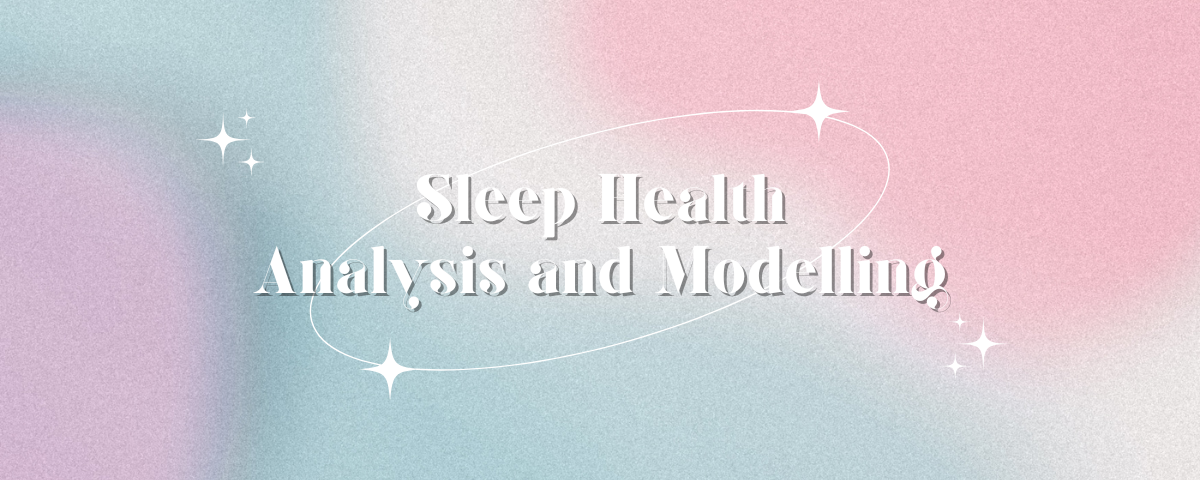


# Sleep Health / EDA & Modelling
## Introducction
#### In this practice we are going to analyze and make a prediction about sleep health.
After having some difficulties to fall asleep these last months, I have been motivated to make an analysis of the different person profiles and the characteristics that they may have in common when suffering from one type or another of difficulty sleeping.
**This notebook aims to analyze, visualize and predict.**

#### For the prediction we have used the well-known Random Forest, since in previous predictions it has given us good results.



#### Feel free to comment, vote and share this notebook, all feedback is welcome.

Thank you so much

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df.head()

In [ ]:
df = df.drop(columns='Person ID')

In [ ]:
df['Blood Pressure'] = df['Blood Pressure'].replace({'/':'.'}, regex=True).astype('float')

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

# Numerical and Categorical Split

In [ ]:
cat_col = df.select_dtypes('object')

print('There is a total of ',cat_col.shape[1],'categorical columns')

In [ ]:
num_col = df.select_dtypes('number')

print('There is a total of ',num_col.shape[1],'categorical columns')

## Analyze the categorical variables

In [ ]:
fig = plt.figure(figsize=(15, 10))

for i, var in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=var, data=cat_col)
    plt.xticks(rotation=90)

plt.show()

### We notice that in BMI Category the data is redundant, so we are going to group it into just two labels

In [ ]:
df['BMI Category'].value_counts()

In [ ]:
df['BMI Category'] = df['BMI Category'].replace({'Obese':'Overweight','Normal Weight':'Normal'})
df['BMI Category'].value_counts()

## Analyze the Numerical variables

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i, var in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=var, data=num_col)
    plt.xticks(rotation=0)

plt.show()

In [ ]:
sns.heatmap(data=df.corr(),annot=True)

### Heart Rate Outliers

In [ ]:
sns.histplot(num_col,x='Heart Rate')

#### We decided to leave it as it is since the data makes sense.

# TARGET ANALISYS

In [ ]:
TARGET = 'Sleep Disorder'

In [ ]:
df[TARGET].value_counts()

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, hue='Gender', x=TARGET)
plt.title('Distribution of Sleep Disorder by gender', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, hue=TARGET, y='Age',
             multiple = "dodge")
plt.title('Distribution of Sleep Disorder by Age', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, hue=TARGET, y='Occupation')
plt.title('Distribution of Sleep Disorder by Occupation', fontsize=14)
plt.show()

In [ ]:
df.columns

# Preprocessing Categorical Variables

In [ ]:
df.select_dtypes('object').head(2)

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Train Test Split

In [ ]:
X = df.drop(columns=TARGET)
y = df[TARGET]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaler

In [ ]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Selection

In [ ]:
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

print('The model gives' ,accuracy_score(y_test, y_pred), 'accuracy on y_test')


## We look at the prediction

In [ ]:
y_test_pred = pd.DataFrame(rf.predict(X_test), index=y_test.index, columns=[TARGET])

In [ ]:
results_df = y_test_pred.join(y_test, lsuffix='_Prediction', rsuffix='_y_test', how='inner')

results_df.head(30)

## Feature Importance

In [ ]:
feature_score=pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_score,y=feature_score.index)
plt.title('Visualization Feature Importance ')
plt.show()

## F1 Score

In [ ]:
print(classification_report(y_test, y_pred))